In [ ]:
!conda create -n lab1 python=3.10
!conda activate lab1
!pip install numpy


In [ ]:
# Алина Юрьевна

In [ ]:
# 1 моделирование 2 bais 3 лин класификаторы 4 svg 5 кластеризация 

# полносвязные сверточные 

In [1]:
import numpy as np
np.array([1, 2])

array([1, 2])

Выборка 1: сгенерировано 1000 векторов с mean=[1 0]
Выборка 2: сгенерировано 1000 векторов с mean=[-1  1]
Выборка 3: сгенерировано 1000 векторов с mean=[ 1 -2]


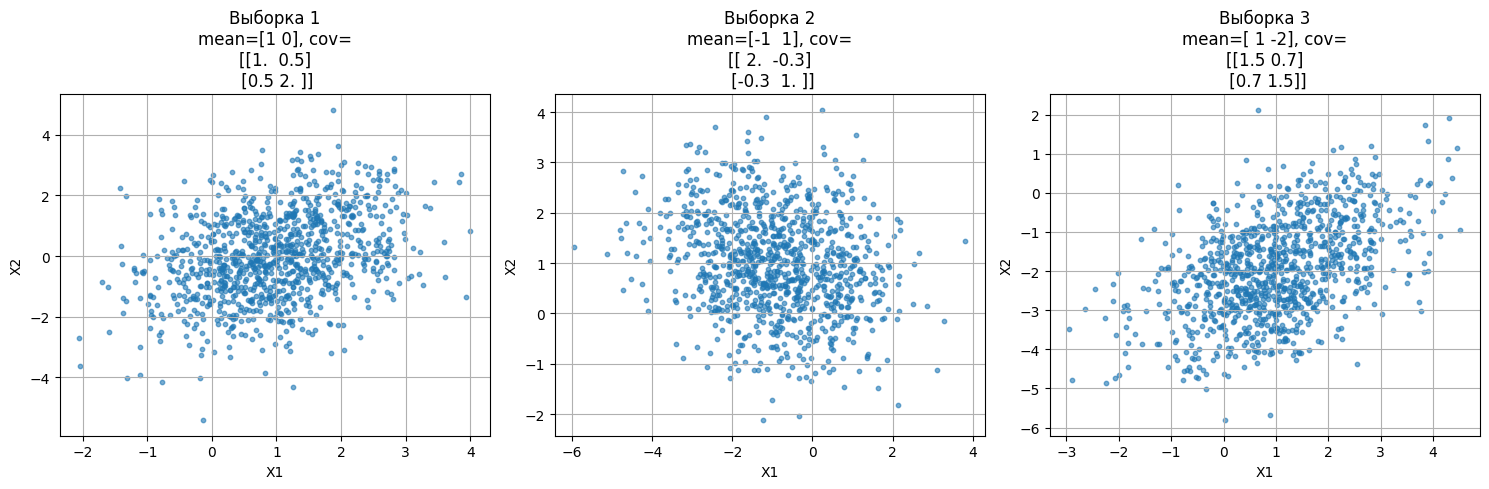


=== Выборка 1 ===
Заданное мат. ожидание: [1 0]
Выборочное мат. ожидание: [ 0.969 -0.004]
Заданная ковариационная матрица:
[[1.  0.5]
 [0.5 2. ]]
Выборочная ковариационная матрица:
[[1.023 0.491]
 [0.491 2.038]]

=== Выборка 2 ===
Заданное мат. ожидание: [-1  1]
Выборочное мат. ожидание: [-0.917  0.993]
Заданная ковариационная матрица:
[[ 2.  -0.3]
 [-0.3  1. ]]
Выборочная ковариационная матрица:
[[ 2.07  -0.3  ]
 [-0.3    1.002]]

=== Выборка 3 ===
Заданное мат. ожидание: [ 1 -2]
Выборочное мат. ожидание: [ 1.014 -1.963]
Заданная ковариационная матрица:
[[1.5 0.7]
 [0.7 1.5]]
Выборочная ковариационная матрица:
[[1.515 0.738]
 [0.738 1.557]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры для ЦПТ — количество слагаемых (чем больше, тем точнее, но 12 достаточно)
N_SUM = 12  # стандартное значение для ЦПТ-аппроксимации нормального распределения

def generate_normal_vector_cpt(size, mean, cov_matrix):
    """
    Генерирует выборку нормально распределённых векторов с заданным mean и cov_matrix,
    используя Центральную предельную теорему.
    
    size: количество векторов в выборке
    mean: вектор мат. ожидания (размерности d)
    cov_matrix: корреляционная (ковариационная) матрица (d x d)
    
    Возвращает: массив размера (size, d)
    """
    d = len(mean)
    
    # Шаг 1: Генерируем стандартизированные нормальные векторы через ЦПТ
    # Генерируем (size, d, N_SUM) равномерных случайных величин
    uniform_samples = np.random.uniform(0, 1, size=(size, d, N_SUM))
    
    # Суммируем по последней оси (по N_SUM)
    sum_uniform = np.sum(uniform_samples, axis=2)  # (size, d)
    
    # Стандартизируем: вычитаем мат. ожидание суммы (N_SUM * 0.5), делим на std (sqrt(N_SUM / 12))
    std_normal_vectors = (sum_uniform - N_SUM / 2) / np.sqrt(N_SUM / 12)  # (size, d)
    
    # Шаг 2: Преобразуем в векторы с заданным mean и cov_matrix
    # Разложение Холецкого: C = L @ L.T
    L = np.linalg.cholesky(cov_matrix)  # нижнетреугольная матрица
    
    # Применяем линейное преобразование: X = mean + L @ Z
    # std_normal_vectors: (size, d) -> транспонируем для удобства умножения
    # L @ Z.T -> затем транспонируем обратно
    transformed = mean + (L @ std_normal_vectors.T).T  # (size, d)
    
    return transformed

# Заданные векторы мат. ожидания
means = [
    np.array([1, 0]),
    np.array([-1, 1]),
    np.array([1, -2])
]

# Зададим корреляционные (ковариационные) матрицы для каждого случая
# Пример: диагональные матрицы с дисперсиями 1 и 2, и корреляцией 0.5
cov_matrices = [
    np.array([[1.0, 0.5],
              [0.5, 2.0]]),
    np.array([[2.0, -0.3],
              [-0.3, 1.0]]),
    np.array([[1.5, 0.7],
              [0.7, 1.5]])
]

# Размер выборки
sample_size = 1000

# Генерация выборок
samples = []
for i in range(len(means)):
    sample = generate_normal_vector_cpt(sample_size, means[i], cov_matrices[i])
    samples.append(sample)
    print(f"Выборка {i+1}: сгенерировано {sample.shape[0]} векторов с mean={means[i]}")

# Визуализация (если нужно)
plt.figure(figsize=(15, 5))
for i in range(len(samples)):
    plt.subplot(1, 3, i+1)
    plt.scatter(samples[i][:, 0], samples[i][:, 1], alpha=0.6, s=10)
    plt.title(f'Выборка {i+1}\nmean={means[i]}, cov=\n{cov_matrices[i]}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Проверка: вычислим выборочные средние и ковариации
for i in range(len(samples)):
    sample_mean = np.mean(samples[i], axis=0)
    sample_cov = np.cov(samples[i], rowvar=False)
    print(f"\n=== Выборка {i+1} ===")
    print(f"Заданное мат. ожидание: {means[i]}")
    print(f"Выборочное мат. ожидание: {sample_mean.round(3)}")
    print(f"Заданная ковариационная матрица:\n{cov_matrices[i]}")
    print(f"Выборочная ковариационная матрица:\n{sample_cov.round(3)}")